In [1]:
import pandas as pd

with open('unbc_PE_predictions.txt', 'r') as f:
    predictions = f.readlines()
    predictions = [x.strip() for x in predictions]
    predictions = [x.split(' ') for x in predictions]
    predictions = pd.DataFrame(predictions)
    predictions['sum'] = predictions.sum(axis=1)
    predictions['sum'].value_counts()

In [2]:
predictions['sum'].value_counts()

sum
100    6861
010    2405
001      83
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

     No Pain       0.96      0.81      0.88      8140
   Mild Pain       0.34      0.73      0.46      1111
Obvious Pain       0.60      0.51      0.55        98

    accuracy                           0.80      9349
   macro avg       0.63      0.68      0.63      9349
weighted avg       0.88      0.80      0.82      9349



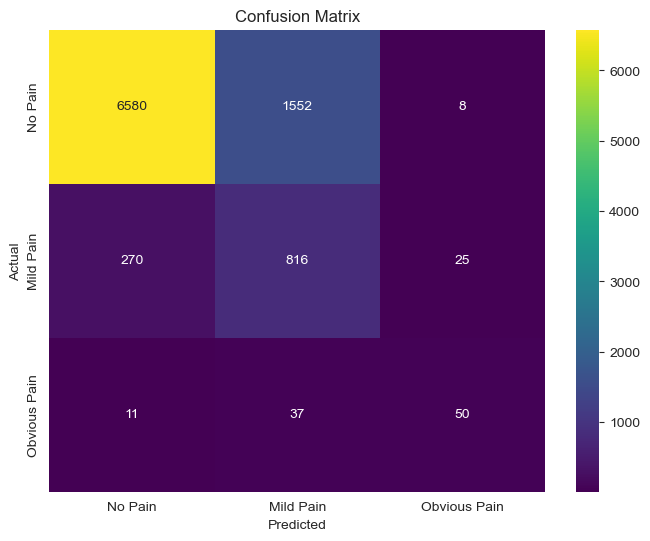

In [3]:
columns = ['Mild Pain', 'No Pain', 'Pain']
label_mapping = {0: 'No Pain', 1: 'Mild Pain', 2: 'Obvious Pain'}

with open('unbc_PE_predictions.txt', 'r') as pred:
    with open('../data/UNBC/list/UNBC_test_pspi_fold1.txt', 'r') as lab:
        # Process labels
        labels = lab.readlines()
        labels = [x.strip() for x in labels]
        labels = [x.split(' ') for x in labels]
        labels = pd.DataFrame(labels, columns=columns)
        labels = labels.astype(int).idxmax(axis=1)  # Convert one-hot to class labels

        # Process predictions
        predictions = pred.readlines()
        predictions = [x.strip() for x in predictions]
        predictions = [x.split(' ') for x in predictions]
        predictions = pd.DataFrame(predictions, columns=columns)
        predictions = predictions.astype(int).idxmax(axis=1)  # Convert one-hot to class labels

# Print precision, recall, f1-score with classification_report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(labels, predictions, target_names=label_mapping.values()))

# Create a 3x3 confusion matrix
cm = confusion_matrix(labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

No Pain
              precision    recall  f1-score   support

           0       0.37      0.77      0.50      1209
           1       0.96      0.81      0.88      8140

    accuracy                           0.80      9349
   macro avg       0.67      0.79      0.69      9349
weighted avg       0.88      0.80      0.83      9349

Mild Pain
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      8238
           1       0.34      0.73      0.46      1111

    accuracy                           0.80      9349
   macro avg       0.65      0.77      0.67      9349
weighted avg       0.88      0.80      0.83      9349

Pain
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9251
           1       0.60      0.51      0.55        98

    accuracy                           0.99      9349
   macro avg       0.80      0.75      0.77      9349
weighted avg       0.99      0.99      0.99      93

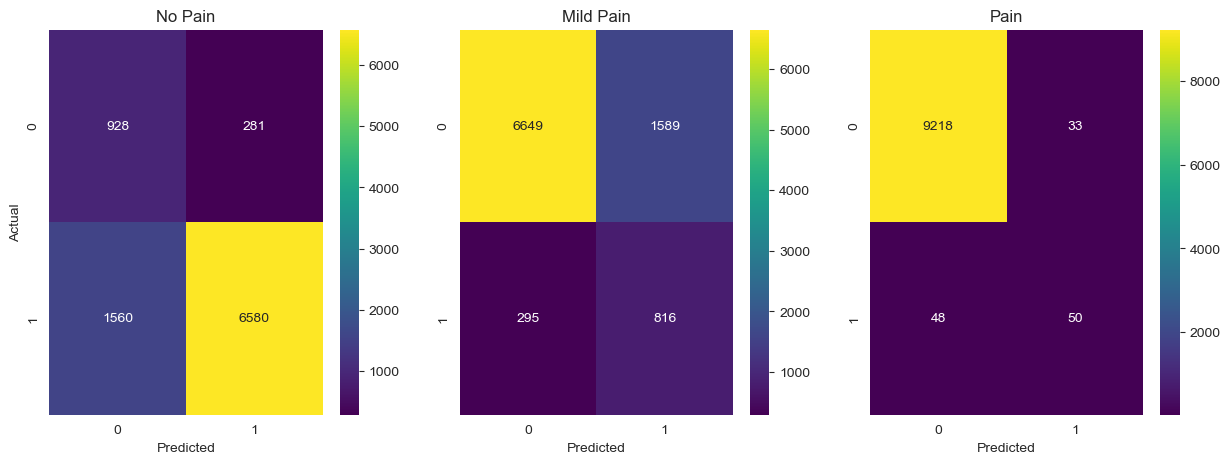

In [4]:
columns = ['No Pain', 'Mild Pain', 'Pain']
with open('unbc_PE_predictions.txt', 'r') as pred:
    with open('../data/UNBC/list/UNBC_test_pspi_fold1.txt', 'r') as lab:
        labels = lab.readlines()
        labels = [x.strip() for x in labels]
        labels = [x.split(' ') for x in labels]
        labels = pd.DataFrame(labels, columns=columns)

        predictions = pred.readlines()
        predictions = [x.strip() for x in predictions]
        predictions = [x.split(' ') for x in predictions]
        predictions = pd.DataFrame(predictions, columns=columns)

# print precision, recall, f1-score with classification_report
from sklearn.metrics import classification_report

for i in range(3):
    print(columns[i])
    print(classification_report(labels.iloc[:, i], predictions.iloc[:, i]))

#create confusion matrices with subplots
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax, fig = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    cm = confusion_matrix(labels.iloc[:, i], predictions.iloc[:, i])
    sns.heatmap(cm, annot=True, fmt=".0f", ax=fig[i], cmap="viridis")
    fig[i].set_title(columns[i])
    fig[i].set_xlabel('Predicted')
fig[0].set_ylabel('Actual')

plt.show()

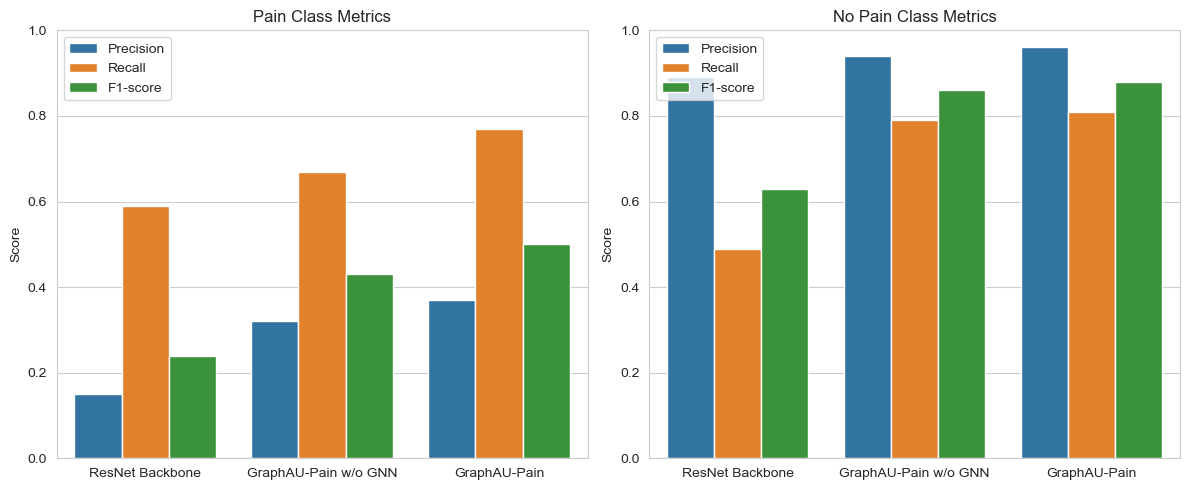

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------
# 1) PREPARE THE DATA
# ------------------------

# Data for the No Pain class (label=0)
no_pain_data = {
    'Model':     ['ResNet Backbone',  'GraphAU-Pain w/o GNN',        'GraphAU-Pain'],
    'Precision': [0.15,             0.32,            0.37],
    'Recall':    [0.59,             0.67,            0.77],
    'F1-score':  [0.24,             0.43,            0.50],
}
df_no_pain = pd.DataFrame(no_pain_data)

# Data for the Pain class (label=1)
pain_data = {
    'Model':     ['ResNet Backbone',  'GraphAU-Pain w/o GNN',        'GraphAU-Pain'],
    'Precision': [0.89,             0.94,            0.96],
    'Recall':    [0.49,             0.79,            0.81],
    'F1-score':  [0.63,             0.86,            0.88],
}
df_pain = pd.DataFrame(pain_data)

# Convert both to "long-form" data for seaborn
df_no_pain_melt = df_no_pain.melt(
    id_vars='Model',
    value_vars=['Precision', 'Recall', 'F1-score'],
    var_name='Metric',
    value_name='Value'
)
df_pain_melt = df_pain.melt(
    id_vars='Model',
    value_vars=['Precision', 'Recall', 'F1-score'],
    var_name='Metric',
    value_name='Value'
)

# ------------------------
# 2) CREATE THE PLOTS
# ------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# --- Plot 1: No Pain class metrics ---
plt.subplot(1, 2, 1)
sns.barplot(data=df_no_pain_melt, x='Model', y='Value', hue='Metric')
plt.title('Pain Class Metrics')
plt.ylim(0, 1.0)
plt.xlabel('')
plt.ylabel('Score')
plt.legend(loc='upper left')

# --- Plot 2: Pain class metrics ---
plt.subplot(1, 2, 2)
sns.barplot(data=df_pain_melt, x='Model', y='Value', hue='Metric')
plt.title('No Pain Class Metrics')
plt.ylim(0, 1.0)
plt.xlabel('')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
